# Analysing Historical Cultures 1

In this session, we work on historical cultures. The methods are not very different from the kind of analytics, which we have already discussed. But the data is only available in texts, which are often the only larger-scale records we have of the past. That’s why we use this opportunity to concentrate on how to analyse texts.

We have already talked about texts a little bit when we were looking at how to analyse the content of tweets. In this session, we will finally find out how to be able to do this by ourselves. Text analysis is an advanced field in the world of computational analytics, and we can rely on a very long tradition of doing text analysis and very established methods. Besides, it is fun and maybe at the same time the dominant form in social and cultural analytics – simply because we humans work so much with texts, documents, etc.

We will go back further in history and mainly work the US State of the Union Address. This allows us to look into the past state of the political constitution of the USA. The State of the Union (SOTU) data is taken from http://stateoftheunion.onetwothree.net/index.shtml and provides access to the corpus of all the State of the Union addresses from 1790 to 2015 at the time of writing. SOTU allows you to explore how specific words gain and lose prominence over time, and to link to information on the historical context for their use.

We did all the hard work of loading this data for you. Just run the cell below to load the data frame sotu_df.

In [1]:
#Keep cell
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 8]

sotu_df = pd.read_csv('data/sotu_all.csv')
sotu_df.head()

,rownames,speechtext,year,date
0,17900108.html,Fellow-Citizens of the Senate and House of Re...,1790,17900108
1,17901208.html,Fellow-Citizens of the Senate and House of Re...,1790,17901208
2,17911025.html,Fellow-Citizens of the Senate and House of Re...,1791,17911025
3,17921106.html,Fellow-Citizens of the Senate and House of Re...,1792,17921106
4,17931203.html,Fellow-Citizens of the Senate and House of Re...,1793,17931203


You can see the structure of the data frame, but you cannot completely see what is in the speechtext column. There is too much text. Try and print out the first text entry with `sotu_df.loc[0, 'speechtext'].item()`.

In [2]:
sotu_df.loc[0, 'speechtext']

' Fellow-Citizens of the Senate and House of Representatives: I embrace with great satisfaction the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs. The recent accession of the important state of North Carolina to the Constitution of the United States (of which official information has been received), the rising credit and respectability of our country, the general and increasing good will toward the government of the Union, and the concord, peace, and plenty with which we are blessed are circumstances auspicious in an eminent degree to our national prosperity. In resuming your consultations for the general good you can not but derive encouragement from the reflection that the measures of the last session have been as satisfactory to your constituents as the novelty and difficulty of the work allowed you to hope. Still further to realize their expectations and to secure the blessings which a gracious Providence has pl

As we saw above, the data frame also contains the column 'year' and 'date'.

Let's check out the types of these values. We can do this in many ways in Pandas. Try `sotu_df.info()`.

In [3]:
sotu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rownames    235 non-null    object
 1   speechtext  235 non-null    object
 2   year        235 non-null    int64 
 3   date        235 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.5+ KB


You can also use `sotu_df.dtypes` to print out the data types directly.

In [4]:
sotu_df.dtypes

rownames      object
speechtext    object
year           int64
date           int64
dtype: object

The rownames and speechtexts look ok as strings ('object'). But the date is an int64 and not recognized as a date. 

sotu_df’s date is clearly a date-string in the format YYYYMMDD. Pandas has the powerful pd.to_datetime() function that can parse such character strings and transform them into Python's date objects. The advantage is that we can then compare dates with each other, add dates to other dates, etc. Run `sotu_df['date'] = pd.to_datetime(sotu_df['date'])`.

In [5]:
sotu_df['date'] = pd.to_datetime(sotu_df['date'])

We want the years to be strings because we will use them as titles to speeches and not as numeric years. Type in `sotu_df['year'] = sotu_df['year'].astype(str)`. Do you remember astype? str indicates the string type.

In [6]:
sotu_df['year'] = sotu_df['year'].astype(str)

Fighting with different formats of date and time is a key part of analysing culture and society computationally. For some past events, for instance, we do not know exact dates or times and have to work with estimates. Sometimes, we only know the approximate time span of when, say, a Roman consul lived. This can cause a lot of issues.

Runing `sotu_df.info()` again will confirm that all the columns are now of the correct type.

In [7]:
sotu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rownames    235 non-null    object        
 1   speechtext  235 non-null    object        
 2   year        235 non-null    object        
 3   date        235 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 7.5+ KB


With sotu_df, we have a collection of documents reflecting over 200 years in the history of the US in the words of each president. It is time to do something with it and text-mine it. Text Mining is the process of deriving meaningful information from natural language text. As said, text mining is a very established discipline. 

Natural Language Processing (NLP) is a component of text mining that performs a special kind of linguistic analysis that essentially helps a machine 'read' text. The Natural Language Toolkit (NLTK; https://www.nltk.org) is a Python package for natural language processing.

In this chapter, we are going to cover some of the most commonly used NLP methods with the NLTK package and employ them to analyse the historical content of the State of the Union speeches. To this end, first we need to create a so-called corpus. A corpus is term originating from the linguistics community. All you need to know about a corpus is that it is basically a collection of text documents. In Python, you can create a corpus from many sources (online or local) and from many different formats such as plain text or PDF.

If you are interested, please check online for the many ways NLTK is used. For now we will just import it with `import nltk`.

In [8]:
import nltk

The first task we set ourselves is to understand historical policy differences. The last SOTU address of the Republican George W. Bush was in 2008, while the first one of the Democrat Barack Obama was in 2009. These were also the years of the height of a very severe financial crisis. So, we expect interesting changes in content. 

To identify these, we would like to produce a word cloud to compare the most frequent terms in both speeches in order to understand policy differences. Let us first create a smaller sample of the data containing only the speeches of 2008 and 2009. We can use pandas df.loc by selecting the rows that contain the column value 2008 or 2009 to create a new sotu_2008_2009 data frame containing only the speeches of 2008 and 2009.

Run `sotu_2008 = sotu_df.loc[sotu_df['year']=='2008','speechtext'].item()`. Observe that year is a string and we need to use '2008' and not just 2008. You should know how this works, but item() might be new? It gets the content of the cell you are addressing in the data frame.

In [9]:
sotu_2008_text = sotu_df.loc[sotu_df['year']=='2008','speechtext'].item()

Now, do the same thing with 2009 to create sotu_2009_text.

In [10]:
sotu_2009_text = sotu_df.loc[sotu_df['year']=='2009','speechtext'].item()

Next we create a corpus for each year. We first need to tokenize the words, which means we break the text into its units, which are words. NLTK has a simple tokenizer for us but there are many choices in Python, too. You might want to google for tokenizing in Python? 

Let's import the NLTK word tokenizer first with `from nltk.tokenize import word_tokenize`.

In [11]:
from nltk.tokenize import word_tokenize

Now, we create two copora of words for each text: corpus_2008 and corpus_2009. Run `corpus_2008 = word_tokenize(sotu_2008_text)`.

In [12]:
corpus_2008 = word_tokenize(sotu_2008_text)

Please, create corpus_2009.

In [13]:
corpus_2009 = word_tokenize(sotu_2009_text)

Now we need to go an clean the data. There is a lot of bad data in text and this is an important process. The Bad Data Handbook - Cleaning Up The Data So You Can Get Back To Work by McCallum and published by O’Reilly is an excellent summary of this other side of big data. The bigger the data the more likely it is also somehow ‘bad’!

But it is not just bad data we are concerned with. We simply need to do a lot of steps for a computer to recgonize the differences in language. These steps are often the same. We want to first make all words lower_case. This makes it easier to count them. Why? We also want to remove numbers from our word cloud, as they do not really add meaning in our context. The NLTK tokenizer also sees punctuation as words. So, we need to do something about that. 

Python has a function isalpha(), that checks whether a token consists only of alphabetic lettters [A-Za-Z]. This will also remove all numbers. 

Try `corpus_2008 = [word.lower() for word in corpus_2008 if word.isalpha()]`.

In [14]:
corpus_2008 = [word.lower() for word in corpus_2008 if word.isalpha()]

I hope you remember how list comprehension works? The above statement runs through all the words in corpus_2008 and keeps only those that are not numbers with word.isalpha(). To those, it applies lower(), which does what its name says it does. 

Try your luck for corpus_2009!

In [15]:
corpus_2009 = [word.lower() for word in corpus_2009 if word.isalpha()]

The most frequently used words in a document generally carry its meaning. But, here are also so-called stopwords such as the, a, or, etc., which usually carry less meaning than the other expressions in the corpus. You will see what kind of words I mean by checking out NLTK's stopwords corpus. Run the cell below.

In [16]:
#Keep cell
from nltk.corpus import stopwords
stopword_list = list(stopwords.words('english'))
stopword_list[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Do you agree that these words do not really carry meaning in English? Stopwords should be removed to concentrate on the most important words. Let us do so by checking for each word in our corpus whether it is in the sopwords corpus. 

Run `corpus_2008 = [word for word in corpus_2008 if word not in stopword_list]`.

In [17]:
corpus_2008 = [word for word in corpus_2008 if word not in stopword_list]

Please, remove the stopwords from corpus_2009 next.

In [18]:
corpus_2009 = [word for word in corpus_2009 if word not in stopword_list]

Let us next prepare a simple word cloud for both the corpora, by joining them. We can simply add the two lists with +. Create `corpus_2008_2009 = corpus_2008 + corpus_2009`.

In [19]:
corpus_2008_2009 = corpus_2008 + corpus_2009
corpus_2008_2009[:10]

['madam',
 'speaker',
 'vice',
 'president',
 'cheney',
 'members',
 'congress',
 'distinguished',
 'guests',
 'fellow']

The wordcloud we want to create needs a single text as input. With `text_2008_2009 = ' '.join(corpus_2008_2009)`, you can do that. It took me a while to understand this command, but it is best to simple translate this as join all elements of the list and add a ' ' in-between. This is often used to move back from the tokenized text in a list of strings to the original text. 

In [20]:
text_2008_2009 = ' '.join(corpus_2008_2009)

As you might have guessed already, the word cloud exercise does not just help to make word clouds, but introduces you to many of the steps that you need to do for text analysis. You always split the text into words. Then, clean those words to the ones you want and then join them back into a text. That's it ...

We are ready to create a word cloud. First load the function with `from wordcloud import WordCloud`.

In [21]:
from wordcloud import WordCloud

The word cloud function has a lot of customization options: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud. We would like to use white as a background colour and only use 500 words. We also set width and height. 

So, please type in `wc_2008_2009 = WordCloud(background_color = 'white', width=1500, height=1000, max_words=500).generate(text_2008_2009)`. Generate takes our text and sends it to the word cloud function.

In [22]:
wc_2008_2009 = WordCloud(background_color = 'white', width=1500, height=1000, max_words=500).generate(text_2008_2009)

Even for such a small corpus this might take a while. You can see the result with Matplotlib's `plt.imshow(wc_2008_2009)`.

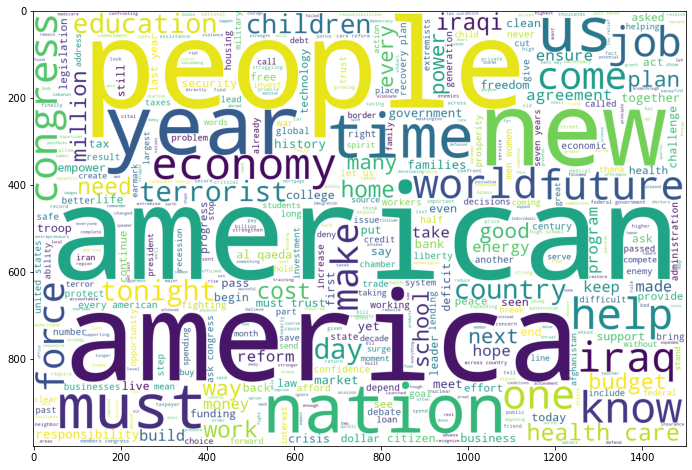

In [23]:
plt.imshow(wc_2008_2009)

Nice - now you also know how we created that Twitter word cloud in the social sensing session. Check out https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb for a great overview of the power of word clouds in Python.


We can clearly see that America is important in 2008 and in 2009 as well as the people of course. More interesting is probably the comparison of the 2008 speech by Bush with the 2009 speech by Obama. But for these we need to create two different corpora. 

Run `text_2008 = ' '.join(corpus_2008)` to generate the text of 2008.

In [24]:
text_2008 = ' '.join(corpus_2008)

Please, also create text_2009.

In [25]:
text_2009 = ' '.join(corpus_2009)

Run the following cell to plot both texts next to each.

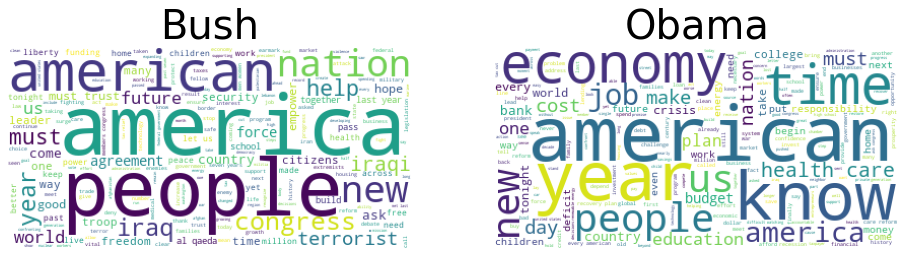

In [26]:
#Keep cell

plt.subplot(1,2,1)
plt.plot()
plt.imshow(WordCloud(background_color = 'white').generate(text_2008))
plt.title('Bush', fontsize = 40)
plt.axis("off")

plt.subplot(1,2,2)
plt.plot()
plt.imshow(WordCloud(background_color = 'white').generate(text_2009))
plt.title('Obama', fontsize = 40)
plt.axis("off")
plt.show()

We can clearly see that Obama concentrated more on the economy while Bush’s favourite topic was the war on terror. We are quite happy with this insight but we also feel we can do better. 

Not bad. Word clouds deliver a little bit of insight. We now feel confident to explore the whole corpus. In the end, we would like to establish some simple linguistic statistics such as the most frequent words/terms in a collection as well as word trends that tell us about the ups and downs of concepts during the history of policy-making in the USA. Check out http://stateoftheunion.onetwothree.net/sotuGraph/index.html for a visualisation to compare two concepts in the SOTU speeches. 

In order to analyse the documents, we will simply count their words and create what is called a document-term matrix. According to https://en.wikipedia.org/wiki/Document-term_matrix, 'a document-term matrix (DTM) is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.' This rather technical description covers a bit up that DTMs and vectorization in general are the prinicipal way how computers read texts.

In SciKit, we have a very powerful function called CountVectorizer to do all the hard work for us. First load it with `from sklearn.feature_extraction.text import CountVectorizer`.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

Now it gets a bit complicated. We first define the vectorizer with `vectorizer = CountVectorizer(lowercase = True, stop_words = 'english', token_pattern = '[a-zA-Z]+')`. This does not only count words, but it also cleans the texts as we had done before. It lowercases words, removes stopwords and keeps only non-numeric character with the regular expression [a-zA-Z][a-zA-Z][a-zA-Z]+. We repeat this three times to keep only words of at least length three.

In [28]:
vectorizer = CountVectorizer(lowercase = True, stop_words = 'english', token_pattern = '[a-zA-Z][a-zA-Z][a-zA-Z]+') 

In the language of SciKit, we need to fit and transform the vectorizers to create vectors fo the speeches. Just ignore this for the time being. We will come back to it in later sessions.

Run `vectors = vectorizer.fit_transform(sotu_df['speechtext'])`.

In [29]:
vectors = vectorizer.fit_transform(sotu_df['speechtext'])

Now, we can create the DTM by running the cell below. It uses a data frame with the matrix of vectors as an input. The column names are the features of vectorizer which are the words in the speeches. And, we index the data frame with the sotu_df years. 

In [30]:
#Keep cell 
dtm_df = pd.DataFrame(vectors.toarray(),
                      columns = vectorizer.get_feature_names(), 
                      index = sotu_df['year'])

dtm_df.head()

,aaa,aana,aaron,abandon,abandoned,abandoning,abandonment,abandons,abate,abated,...,zimbabwe,zimbabwean,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga
year,,,,,,,,,,,,,,,,,,,,,
1790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Where we have a document-term-matrix, we also have a term-document-matrix with the terms in the rows and documents in the columns. Running the cell below, gives you an example. 

It also shows you how to use the TF-IDF vectorizer, which we discussed a bit in the video: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.

The syntax is the same, but TfidfVectorizer is often preferred when we process texts as it consider not only frequent words (TF) but also those that do not appear across too many documents (IDF) and are therefore specific. According to https://en.wikipedia.org/wiki/Tf%E2%80%93idf, 'TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.'

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase = True, stop_words = 'english', token_pattern = '[a-zA-Z][a-zA-Z][a-zA-Z]+')
vec = tfidf.fit_transform(sotu_df['speechtext'])
 
pd.DataFrame(vec.toarray().transpose(), index=tfidf.get_feature_names(), columns = sotu_df['year']).head()

year,1790,1790,1791,1792,1793,1794,1795,1796,1797,1798,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
aaa,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
aana,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
aaron,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
abandon,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.025244,...,0.0,0.0,0.0,0.008825,0.0,0.0,0.0,0.0,0.008976,0.0
abandoned,0.0,0.0,0.0,0.0,0.0,0.0,0.027835,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In both matrixes, we mainly see a lot of zero values. Many words are simply missing from many documents. All these kinds of matrixes are very space. 

To focus a bit more on relevant words, we can, for example, sort the DTM in ascending order for a certain year ('1791'), which are in our rows. Run `dtm_df.sort_values(by='1791',ascending=False, axis=1).head()`. by gives the index to sort by. We set ascending = False. With axis = 1, we focus on rows.

In [32]:
dtm_df.sort_values(by='1791', ascending=False, axis=1).head()

,states,united,public,proper,government,important,provision,measures,law,objects,...,faith,fakirs,fake,faiths,faithless,faithfulness,faithfully,faithful,faithbased,zuloaga
year,,,,,,,,,,,,,,,,,,,,,
1790,4,4,5,3,4,2,2,4,1,1,...,0,0,0,0,0,0,0,0,0,0
1790,3,2,5,0,3,0,1,3,2,3,...,1,0,0,0,0,0,0,0,0,0
1791,18,17,10,7,7,7,7,6,6,6,...,0,0,0,0,0,0,0,0,0,0
1792,5,5,5,6,3,0,7,4,6,2,...,0,0,0,0,0,0,0,0,0,0
1793,24,22,7,1,3,2,1,2,5,2,...,1,0,0,0,0,0,0,1,0,0


We can also view only parts of the data frame and sort for each year seperately and compare them with another year.
 
Let's try and do this for 2008 and 2009. First set `dtm_df_2008_2009 = dtm_df.loc[['2008', '2009'], :]` to create a specific data frame looking at 2008 and 2017.

In [33]:
dtm_df_2008_2009 = dtm_df.loc[['2008', '2009'], :]

Then, let's sort this according to Bush's speech. You can use again the function sort_values(), which you should already know. Run `dtm_df_2008_2009 = dtm_df_2008_2009.sort_values(by='2008', ascending=False, axis = 1)`.

In [34]:
dtm_df_2008_2009 = dtm_df_2008_2009.sort_values(by='2008', ascending=False, axis = 1)

Now type in `dtm_df_2016.loc[['2016', '2017'], :15]` to print out the 15 top terms.

In [35]:
dtm_df_2008_2009.iloc[:,:20]

,people,america,congress,new,year,iraq,american,help,nation,trust,terrorists,world,future,forces,iraqi,country,ask,government,past,empower
year,,,,,,,,,,,,,,,,,,,,
2008,30,30,27,25,24,22,20,19,18,17,14,13,13,13,12,12,12,12,11,11
2009,20,18,10,20,9,4,25,8,12,2,2,11,10,2,0,12,5,7,0,0


We can see some clear differences between Bush and Obama. Iraq, for instance, disappears almost completely in Obama's speech. Bush seems to also repeat some top words more frequently that are not so important to Obama. It would be intresting to now sort this according to Obama's speech, but we want to move on.

If we want, we could also check the total word count/length of each speech by summing up the values of each of the columns, pandas has a good function for that: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html. Please, run `dtm_df.sum(axis=1).sort_values(ascending = False).head(10)` for the 10 longest speeches. Can you match them to presidents? Wikipedia is your friend.

In [36]:
dtm_df.sum(axis=1).sort_values(ascending = False).head(10)

year
1981    17742
1946    13458
1907    11793
1912    11254
1905    10755
1911    10506
1906    10070
1898     9282
1848     8856
1885     8733
dtype: int64

Interesting! If we would run this function on the whole DTM, we could filter out the shortest and longest speeches using the subset, min and max functions. Any idea how? 

But we move on, as there are many more things to discover. We are also interested in the words/terms and their frequencies, which will tell us more about the contents of the various speeches. With sum(), we just change the axis to columns to find the most frequently used ten words across all the speeches. Try it with `dtm_df.sum(axis=0).sort_values(ascending = False).head(10)`.

In [37]:
dtm_df.sum(axis=0).sort_values(ascending = False).head(10)

government    7116
states        6533
congress      5051
united        4874
people        4152
year          4050
country       3501
great         3287
public        3101
new           3055
dtype: int64

You can now split up the DTM into particular years or words, etc. and compare the most frequently used words for all the different combinations. It's easy, no?

I also like corrwith (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html), which we can use to see which words correlate with a particular term like 'peace'. Run `dtm_df.corrwith(dtm_df['peace']).sort_values(ascending=False).head(10)`. It tells Pandas to pair-wise correlate all columns in dtm_df with the 'peace' column and sort according the highest correlations.

In [38]:
dtm_df.corrwith(dtm_df['peace']).sort_values(ascending=False).head(10)

peace            1.000000
war              0.593374
forces           0.557807
nations          0.542290
military         0.538437
army             0.519636
contributions    0.510613
peoples          0.498592
occupation       0.480239
effort           0.471497
dtype: float64

Find the word associations of 'war' then ...

In [39]:
dtm_df.corrwith(dtm_df['war']).sort_values(ascending=False).head(10)

war             1.000000
recommended     0.720418
unliquidated    0.719113
expenditures    0.714290
wartime         0.708878
substandard     0.707719
prewar          0.707295
reconversion    0.701651
dollars         0.700514
lend            0.694223
dtype: float64

Well, it seems that peace is mainly a thing of war and war is correlated with 'recommended'! Quite sad now about the world, we move on from the simple linguistic statistics we have done so far - mainly based on word frequencies. Next, we enter the domain of word trends, which are always liked as a digital method. 

We would like to plot word trends. as we have seen them on the SOTU website. We already have the dataframe for that, the one with all the word counts for each year, let's use that to plot the trend of 'america' over the years. We simply select `df_america = dtm_df['america']`. Also print out the first rows of df_america.

In [40]:
df_america = dtm_df['america']
df_america.head()

year
1790    0
1790    0
1791    0
1792    0
1793    0
Name: america, dtype: int64

Such easy availability of the word frequencies is the real power of DTMs.

We would like to plot the word trends next. But first we have to reset the standard figure size in our notebooks. We increased it earlier (without telling you) to make the word clouds more visible. Run the cell below.

In [41]:
#Keep cell

plt.rcParams['figure.figsize'] = [8, 4]

We already know how to plot a simple numerical series in Pandas and type with confidence: `df_america.plot()`.

<AxesSubplot:xlabel='year'>

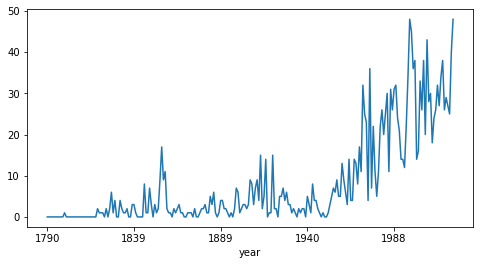

In [42]:
df_america.plot()

For comparison, we add another line-plot about citizens. Try `dtm_df[['america', 'citizen']].plot()`.

<AxesSubplot:xlabel='year'>

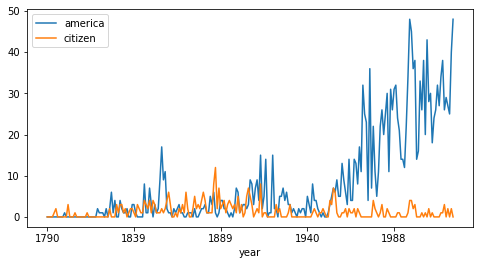

In [43]:
dtm_df[['america', 'citizen']].plot()

Overall, the plot is not very nice. This is part of the limitation of the built-in plotting function. It is a quick solution but often not a very pretty one. Good for data exploration but not representation! In the session on visualisations, we will meet a much more powerful plotting package called seaborn. But this would be a distraction now ...

Try the hype of word trends yourself. Create a new plot for the historical development of the idea of ‘history’. 

<AxesSubplot:xlabel='year'>

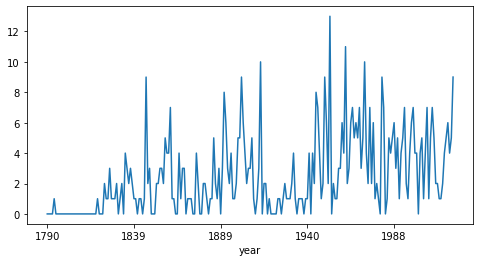

In [44]:
dtm_df['history'].plot()

As a final topic of today, we will talk about yet another very popular method called topic moddeling. Check out https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/ for a nice and easy overview. 

Wouldn’t it be nice if we could compare not just words but whole topics across documents in a collection? This is what the advanced technique topic modelling does. Topic Modelling summarises a collection of texts into a predefined number of topics. Have a look at http://journalofdigitalhumanities.org/2-1/topic-modeling-and-digital-humanities-by-david-m-blei/.

Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structures in a collection of texts. Topic modelling is also popular, as it requires only minimal text organisation. Computers can learn topics by themselves. There are, however, known limitations of topic models with regard to the interpretation they help with. There is no guarantee that the automatically derived topics will correspond to what people would consider to be interesting topics/themes. They may be too specific or general, identical to other topics or they may be framings of larger topics, as opposed to genuinely distinct topics. Finally (and in common with other computational analysis techniques), the performance of topic modelling depends upon the quality and structure of the data/text. 

We will use a topic modelling techniques called Latent Dirichlet Allocation: https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation. Try and understand the wikipedia article, but you will learn better from trying it. First load the corresponding function with `from sklearn.decomposition import LatentDirichletAllocation`.

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

Now, we can use our vectorizered texts to fit the topic models with `lda = LatentDirichletAllocation(n_components=10).fit(vectors)`. n_components = 10 means that we want to find 5 topics. We have to provide the number of topics in advance in topic modelling.

In [46]:
lda = LatentDirichletAllocation(n_components=5).fit(vectors)

In [47]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))                        

    print()

Run the next cell to print out ten terms associated with each of the topics.

In [48]:
#Keep cell

print("\nTopics in LDA model:")
feature_names = vectorizer.get_feature_names()
print_top_words(lda, feature_names, 5)


Topics in LDA model:
Topic #0:
states government united congress public
Topic #1:
people world new america year
Topic #2:
government congress national public people
Topic #3:
states government united year congress
Topic #4:
upright lamentably uncommon resided homeward



So how do we interpret this? It shows the top 5 keywords that contribute to each topic. 

For example the keywords in my topic 0 are: government federal year congress world. This might be different for you, as the topic modelling is initiated with random values. The order of topics might therefore be different.

We can also identify the top topic for each speech. Run the next cell. Please, note it only shows a random sample of 20 speeches for viusalisation reasons.

In [49]:
#Keep cell

import random

doc_topic = lda.transform(vectors)

for n in sorted(random.sample(range(doc_topic.shape[0]), 20)):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}\n".format(n,topic_most_pr))

doc: 2 topic: 0

doc: 4 topic: 0

doc: 10 topic: 0

doc: 18 topic: 0

doc: 30 topic: 0

doc: 72 topic: 3

doc: 75 topic: 3

doc: 78 topic: 0

doc: 90 topic: 3

doc: 106 topic: 3

doc: 109 topic: 3

doc: 127 topic: 2

doc: 128 topic: 2

doc: 139 topic: 2

doc: 143 topic: 2

doc: 161 topic: 1

doc: 171 topic: 1

doc: 179 topic: 1

doc: 182 topic: 1

doc: 193 topic: 1



You should at least see how the topics change over time with the earlier documents having a different most important topic than the later ones?

When you have time, you could fun by going back to the  topics you have found and try and give each of them a title that describes it. Sometimes this is not so easy, because the corpus is quite small. But do try your best.

Let’s move on to the second part of this session.